In [3]:
import pickle
from collections import defaultdict
from tqdm import tqdm_notebook
import multiprocessing
import sys, socket, os
import matplotlib.pyplot as plt

dump_directory = "/home/srivbane/shared/caringbridge/data/projects/place-project/DataResults"

def load_to_memory(minute):
    
    folder_id = minute//60
    df = pickle.load(open(dump_directory+"/ClusterResults/hour-"+str(folder_id)+"/cluster-"+str(minute).zfill(4)+".res", "rb"))
    dict1 = {}
    counter = 0
    for x in df:
        dict1[counter] = x
        counter += 1
    return dict1
    
def check_intersection(region1, region2):
    
    similarity_threshold = 0.25
    
    region1 = set(region1)
    region2 = set(region2)

    smaller_set = region1 if len(region1) < len(region2) else region2
    intersecting_set = region1 & region2

    if len(intersecting_set) / len(smaller_set) > 0:
        overlap.append(round(len(intersecting_set) / len(smaller_set), 2))
        return True
    
    return False


def compare_regions(initial_time):
    t1 = initial_time
    t2 = initial_time+1
        
    links = defaultdict(list)
    
    r1 = load_to_memory(t1)
    r2 = load_to_memory(t2)

    for t1_id in r1:
        
        t1_region = r1[t1_id]
        
        for t2_id in r2:
            
            t2_region = r2[t2_id]
            
            is_subset = check_intersection(t1_region, t2_region)
            
            if is_subset:
                links[t1_id].append(t2_id)

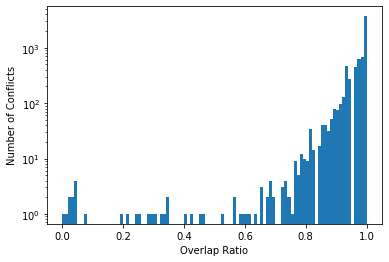

In [4]:
overlap = []

for x in tqdm_notebook(range(30)):
    compare_regions(x)
    
def distribution_histogram(distribution):
    plt.hist(distribution, bins = 100)
    plt.ylabel('Number of Conflicts')
    plt.xlabel('Overlap Ratio')
    plt.yscale('log') 
    plt.show()
    
distribution_histogram(overlap)